## NN Adv Assignment

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Pytorch

import torch
import torch.nn as nn
import torch.nn.functional as F

### TensorFlow

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings(action='ignore')

### Load Data

In [43]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [45]:
train['label'].nunique()

10

In [46]:
X = train.iloc[:, :-1].values
X = X.reshape(-1, 28, 28, 1)
y = train.iloc[:, -1].values

In [47]:
X_test = test.values
X_test = X_test.reshape(-1,28, 28,1)

### Train-Test Split

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y, shuffle = True)

# 정규화
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [49]:
BATCH_SIZE = 128
EPOCHS = 15

In [50]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')

])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [51]:
initializer = keras.initializers.HeUniform(seed = 42)
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [52]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))


Epoch 1/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.6258 - accuracy: 0.7830 - val_loss: 0.5958 - val_accuracy: 0.8149
Epoch 2/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.4835 - accuracy: 0.8298 - val_loss: 0.4593 - val_accuracy: 0.8373
Epoch 3/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.4546 - accuracy: 0.8389 - val_loss: 0.4562 - val_accuracy: 0.8394
Epoch 4/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.4510 - accuracy: 0.8408 - val_loss: 0.4818 - val_accuracy: 0.8398
Epoch 5/10
1488/1488 [==============================] - 5s 4ms/step - loss: 0.4247 - accuracy: 0.8476 - val_loss: 0.4156 - val_accuracy: 0.8545
Epoch 6/10
1488/1488 [==============================] - 5s 4ms/step - loss: 0.4171 - accuracy: 0.8516 - val_loss: 0.4266 - val_accuracy: 0.8550
Epoch 7/10
1488/1488 [==============================] - 5s 4ms/step - loss: 0.4057 - accuracy: 0.8580 - val_loss: 0.4370 - val_accuracy:

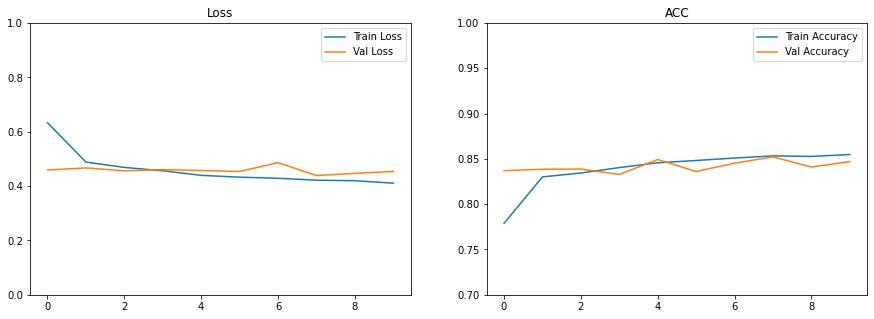

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

Trying Batch Normalization / Layer Normalzation

In [53]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [60]:
model = keras.Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add((Dropout(0.25)))
model.add(Conv2D(64, kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add((Dropout(0.25)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add((Dropout(0.25)))
model.add(Dense(10, activation='softmax'))


model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 5, 5, 64)         

In [63]:
result = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=15,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/15
372/372 [==============================] - 2s 6ms/step - loss: 0.4005 - accuracy: 0.8550 - val_loss: 0.3330 - val_accuracy: 0.8815
Epoch 2/15
372/372 [==============================] - 2s 5ms/step - loss: 0.3534 - accuracy: 0.8695 - val_loss: 0.3077 - val_accuracy: 0.8875
Epoch 3/15
372/372 [==============================] - 2s 5ms/step - loss: 0.3260 - accuracy: 0.8818 - val_loss: 0.2872 - val_accuracy: 0.8955
Epoch 4/15
372/372 [==============================] - 2s 5ms/step - loss: 0.3032 - accuracy: 0.8897 - val_loss: 0.2730 - val_accuracy: 0.8983
Epoch 5/15
372/372 [==============================] - 2s 5ms/step - loss: 0.2873 - accuracy: 0.8947 - val_loss: 0.2696 - val_accuracy: 0.9009
Epoch 6/15
372/372 [==============================] - 2s 5ms/step - loss: 0.2701 - accuracy: 0.9009 - val_loss: 0.2580 - val_accuracy: 0.9050
Epoch 7/15
372/372 [==============================] - 2s 5ms/step - loss: 0.2608 - accuracy: 0.9037 - val_loss: 0.2563 - val_accuracy: 0.9038
Epoch 

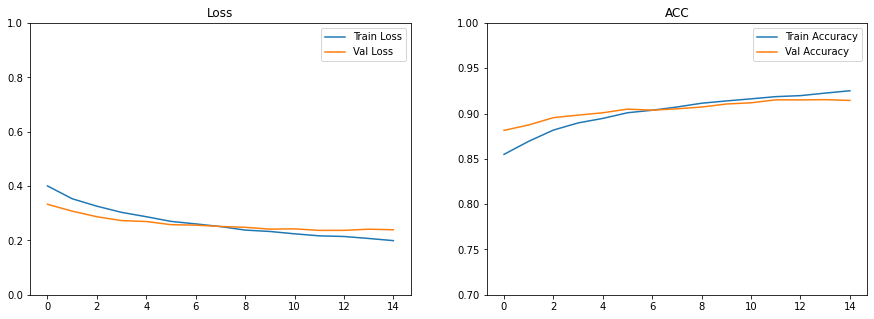

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()